# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\dell\\OneDrive\\Desktop\\Project\\dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

File exists:  C:\Users\dell\OneDrive\Desktop\Project\dataset\test\test\TomatoHealthy4.JPG


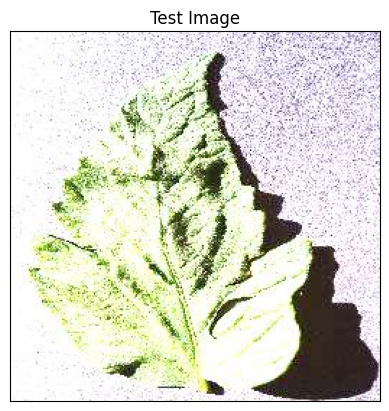

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = r'C:\Users\dell\OneDrive\Desktop\Project\dataset\test\test\TomatoHealthy4.JPG'

# Check if the file exists
if os.path.exists(image_path):
    print("File exists: ", image_path)
    # Reading an image in default mode
    img = cv2.imread(image_path)
    # Check if the image was read correctly
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
        # Displaying the image 
        plt.imshow(img)
        plt.title('Test Image')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        print("Error: The image could not be read. Please check the file format.")
else:
    print("Error: The file does not exist. Please check the file path.")

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


In [6]:
print(predictions)

[[6.65663325e-13 1.19142367e-13 8.58169482e-15 3.39300832e-09
  2.82703917e-12 5.94314820e-09 1.70948044e-16 2.10001463e-13
  8.96842296e-16 1.01525178e-15 1.01820435e-13 2.06131132e-16
  2.06696509e-12 2.22888673e-15 1.43745197e-17 1.86848705e-16
  4.47291198e-14 7.40287579e-16 2.75939321e-15 7.40655706e-14
  1.74493892e-10 2.16835974e-16 5.51533784e-11 1.86665770e-11
  8.41907381e-13 5.12320764e-09 6.53887263e-13 8.26698820e-15
  3.59243719e-16 6.54569105e-15 8.32321989e-11 1.86048694e-11
  3.87573237e-11 4.79233710e-12 1.46854731e-07 3.81079011e-16
  2.06065964e-15 9.99999881e-01]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

37


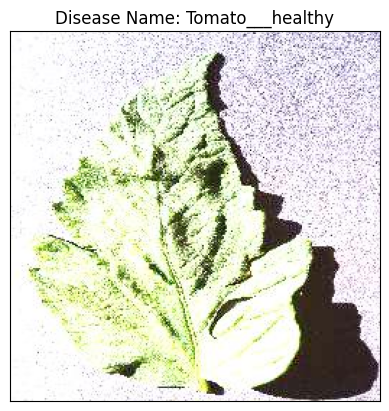

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()